In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [66]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "rt",encoding = "UTF8") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [67]:
img = cv2.imread("images/teddy_bear.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [68]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=True)

net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []

boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        if scores[class_id] != 0:
            print(class_id)
            print(scores[class_id])
        confidence = scores[class_id]
        if confidence > 0.6:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            #print(center_x,center_y)
            w = abs(int(detection[2] * width))
            h = abs(int(detection[3] * height))

            x = abs(int(center_x - w / 2))
            y = abs(int(center_y - h / 2))
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

77
0.30313107
77
0.5725458
77
0.31555143
77
0.95951027
77
0.9879073
77
0.94645345
77
0.3936636
77
0.80268466
77
0.3320049


In [69]:
class_list = list(set(class_ids))
idxx = []
indexes=[]
for i in range(len(class_list)):
    max_v=0
    for j in range(len(class_ids)):
        if class_ids[j] == class_list[i]:
            if max_v < confidences[j]:
                max_v = confidences[j]
                idxx.append(j)
    indexes.append(idxx[len(idxx)-1])            

print(class_ids)

[77, 77, 77, 77]


teddy bear
0.9879072904586792
41 11 378 262
0.1 0.040293040293040296 0.9219512195121952 0.9597069597069597


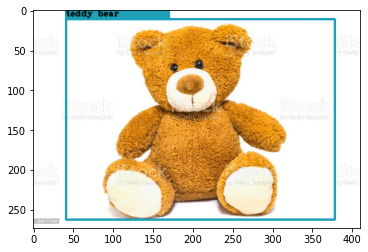

['teddy bear [41, 11, 337, 251]']


In [70]:
font = cv2.FONT_HERSHEY_PLAIN
det_foods = []
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        class_name = classes[class_ids[i]]
        print(class_name)
        print(confidences[i])
        label = f"{class_name} {boxes[i]}"
        det_foods.append(label)
        color = colors[i]
        print(x,y,x+w,y+h)

        nx = (x + w) / width
        ny = (y + h) / height

        if nx > 1:
            nx = 1
        if ny > 1:
            ny =1
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        print(x/width,y/height,nx,ny)
        cv2.rectangle(img, (x - 1, y), (x + len(class_name)*13, y-12), color, -1)
        cv2.putText(img, class_name, (x, y - 4), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0, 0, 0), 1,cv2.LINE_AA)

b,g,r = cv2.split(img)
image2 = cv2.merge([r,g,b])
plt.imshow(image2)
#imShow(img)
plt.show()
print(det_foods)